In [1]:
import sys
sys.path.insert(0,"../src/")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# For pleasant viewing in the notebook
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
FIGPATH = "../figs/"

### Potentially interesting data to plot
- LASSO & Ridge plots showing how the BIAS/VARIANCE plots evolve wrt. lambda in same plot
- Alternatively just the bootstrapped MSE. (less information clutter!)
- Plot of the betas evolve wrt lambda for some semi-low order polynomial (not TOO many parameters to clutter the plots) -> visual representation of how $\lambda$ squishes the betas

In [17]:
#from terrain_analysis import *

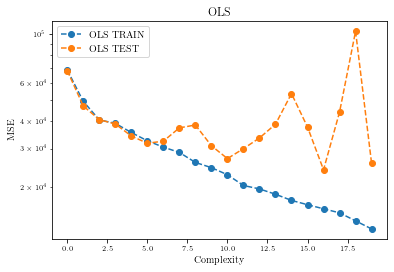

In [3]:
degrees = np.arange(max_degree)
plt.semilogy(degrees, mse_ols_train, "o--", label = "OLS TRAIN")
plt.semilogy(degrees, mse_ols_test, "o--", label = "OLS TEST")
plt.title("OLS")
plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.legend()
#plt.savefig(FIGPATH + "OLS_MSE_Bootstrap_Hastie_211.pdf")

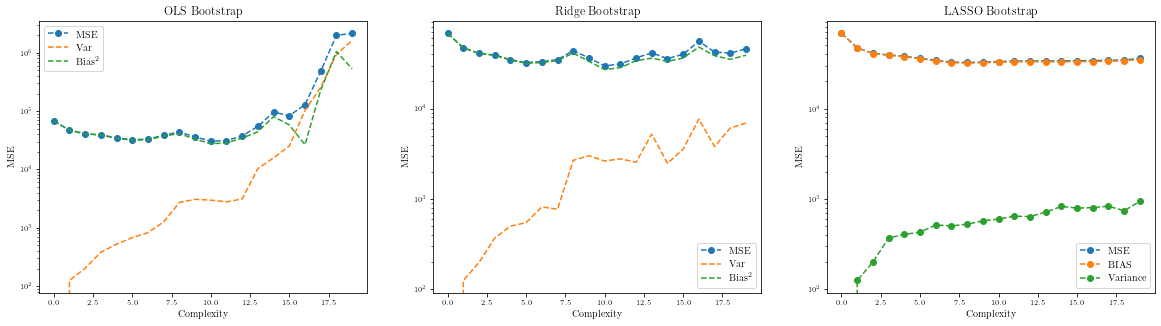

In [4]:
## BOOTSTRAP PLOTS
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.semilogy(degrees, ols_boot_mse,"o--",label="MSE")
plt.semilogy(degrees, ols_boot_variance,"--", label="Var")
plt.semilogy(degrees, ols_boot_bias,"--", label="Bias$^2$")
plt.title("OLS Bootstrap")
plt.xlabel("Complexity")
plt.ylabel("MSE")
#plt.ylim([1e-4, 2e-1])
plt.legend()

plt.subplot(132)
plt.semilogy(degrees, ridge_best_lambda_boot_mse,"o--",label="MSE")
plt.semilogy(degrees, ridge_best_lambda_boot_variance,"--", label="Var")
plt.semilogy(degrees, ridge_best_lambda_boot_bias,"--", label="Bias$^2$")
plt.title("Ridge Bootstrap")
plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.legend()

plt.subplot(133)
plt.semilogy(degrees, lasso_best_lambda_boot_mse,"o--",label="MSE")
plt.semilogy(degrees, lasso_best_lambda_boot_bias,"o--", label="BIAS")
plt.semilogy(degrees, lasso_best_lambda_boot_variance,"o--", label="Variance")
plt.title("LASSO Bootstrap")
plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.legend()

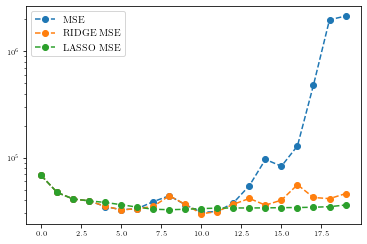

In [5]:
#plt.semilogy(degrees, ols_boot_mse,"o--",label="OLS MSE")
plt.semilogy(degrees, ols_boot_mse,"o--",label="MSE")
plt.semilogy(degrees, ridge_best_lambda_boot_mse,"o--",label="RIDGE MSE")
plt.semilogy(degrees, lasso_best_lambda_boot_mse,"o--",label="LASSO MSE")
plt.legend()

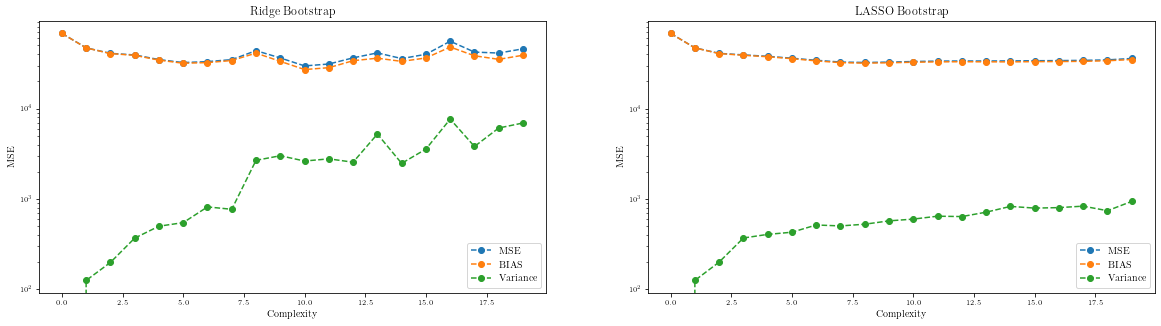

In [6]:
# Same bootstrap plots, but only better resolved LASSO & Ridge
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.semilogy(degrees, ridge_best_lambda_boot_mse,"o--",label="MSE")
plt.semilogy(degrees, ridge_best_lambda_boot_bias,"o--", label="BIAS")
plt.semilogy(degrees, ridge_best_lambda_boot_variance,"o--", label="Variance")
plt.title("Ridge Bootstrap")
plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.legend()

plt.subplot(122)
plt.semilogy(degrees, lasso_best_lambda_boot_mse,"o--",label="MSE")
plt.semilogy(degrees, lasso_best_lambda_boot_bias,"o--", label="BIAS")
plt.semilogy(degrees, lasso_best_lambda_boot_variance,"o--", label="Variance")
plt.title("LASSO Bootstrap")
plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.legend()
plt.show()

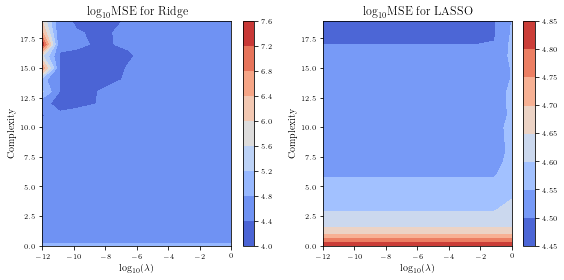

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
X, Y = np.meshgrid(np.log10(lambdas), np.arange(max_degree))
plt.contourf(X, Y, np.log10(ridge_lamb_deg_mse), cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel("$\\log_{10}(\lambda)$")
plt.ylabel("Complexity")
plt.title("$\log_{10}$MSE for Ridge")
plt.subplot(122)
X, Y = np.meshgrid(np.log10(lambdas), np.arange(max_degree))
plt.contourf(X, Y, np.log10(lasso_lamb_deg_mse), cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel("$\\log_{10}(\lambda)$")
plt.ylabel("Complexity")
plt.title("$\log_{10}$MSE for LASSO")
plt.tight_layout()
plt.savefig("example_terreng.pdf")

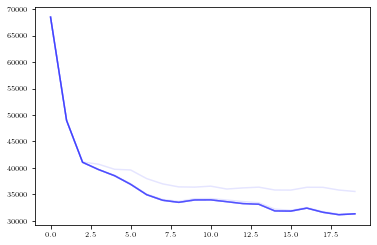

In [8]:
for i in range(n_lambdas):
    plt.plot(lasso_lamb_deg_mse[:, i], color="blue", alpha=0.1)
    
#plt.matshow(lasso_lamb_deg_mse)
#plt.colorbar()

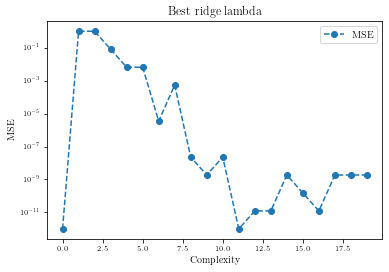

In [9]:
plt.semilogy(degrees, best_ridge_lambda,"o--",label="MSE")
plt.title("Best ridge lambda")
plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.legend()
plt.show()

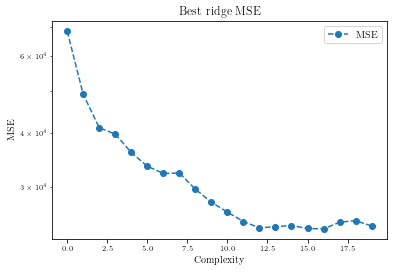

In [10]:
plt.semilogy(degrees, best_ridge_mse,"o--",label="MSE")
plt.title("Best ridge MSE")
plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.legend()
plt.show()

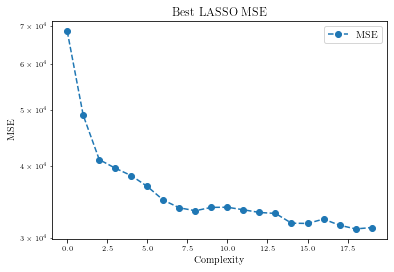

In [12]:
plt.semilogy(degrees, best_lasso_mse,"o--",label="MSE")
plt.title("Best LASSO MSE")
plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.legend()
plt.show()

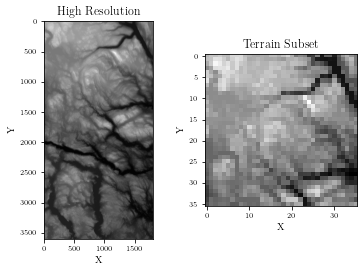

In [13]:
# Show the terrain
plt.figure()
plt.subplot(121)
plt.title("High Resolution")
plt.imshow(terrain_data, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(122)
plt.imshow(point_selection, cmap="gray")
plt.title("Terrain Subset")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

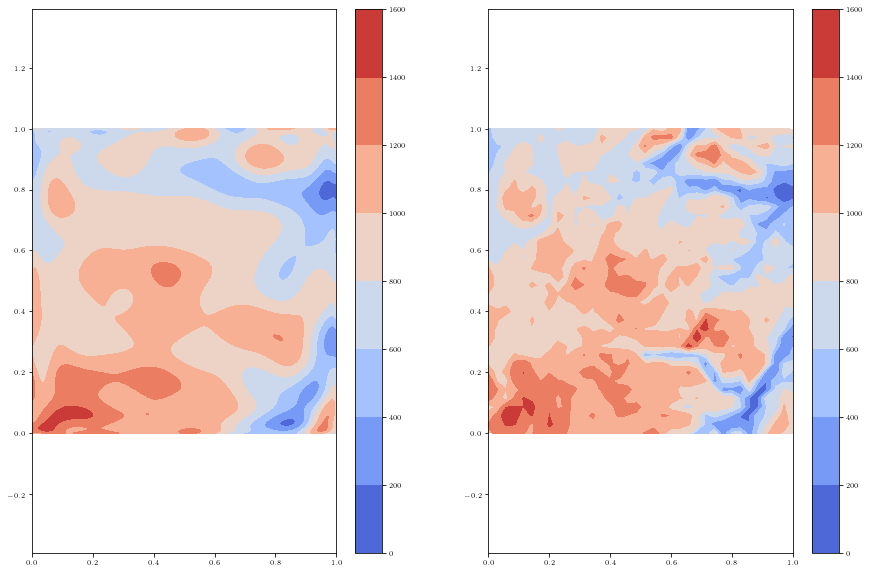

In [21]:
degree = 17

X = linear_regression.design_matrix_2D(x,y,degree)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
betas = linear_regression.OLS_SVD_2D(X_scaled, z)

x_plot = np.linspace(0,1,2000)
y_plot = np.linspace(0,1,2000)
x_plot_mesh, y_plot_mesh = np.meshgrid(x_plot,y_plot)
x_plot_mesh_flat, y_plot_mesh_flat = x_plot_mesh.flatten(), y_plot_mesh.flatten()
X_plot_design = linear_regression.design_matrix_2D(x_plot_mesh_flat,y_plot_mesh_flat,degree)
X_plot_design_scaled = scaler.transform(X_plot_design)
z_predict_flat = (X_plot_design_scaled @ betas) + z_intercept

x_im = np.linspace(0, 1, point_selection.shape[0])
y_im = np.linspace(0, 1, point_selection.shape[1])
X_im, Y_im = np.meshgrid(x_im, y_im)

fig = plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.contourf(x_plot_mesh, y_plot_mesh, z_predict_flat.reshape(2000,-1), cmap=cm.coolwarm)
plt.colorbar()
plt.axis('equal')

plt.subplot(122)
#plt.imshow(point_selection, cmap=cm.coolwarm)
plt.contourf(X_im, Y_im, point_selection, cmap=cm.coolwarm)
plt.axis('equal')
plt.colorbar()

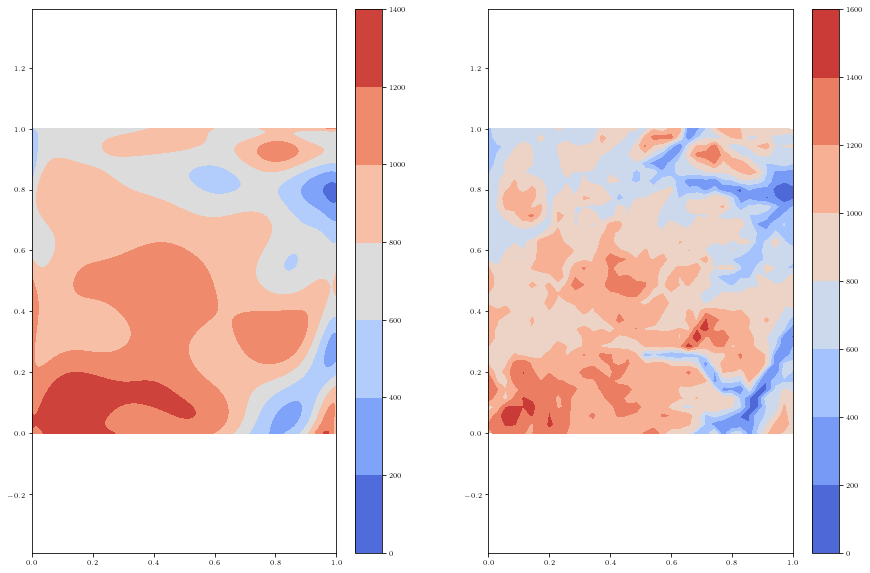

In [20]:
# Ridge

degree = 17
ridge_lambda = 1e-9

X = linear_regression.design_matrix_2D(x,y,degree)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
betas_ridge = linear_regression.Ridge_2D(X_scaled, z, ridge_lambda)


x_plot = np.linspace(0,1,2000)
y_plot = np.linspace(0,1,2000)
x_plot_mesh, y_plot_mesh = np.meshgrid(x_plot,y_plot)
x_plot_mesh_flat, y_plot_mesh_flat = x_plot_mesh.flatten(), y_plot_mesh.flatten()
X_plot_design = linear_regression.design_matrix_2D(x_plot_mesh_flat,y_plot_mesh_flat,degree)
X_plot_design_scaled = scaler.transform(X_plot_design)
z_predict_flat = (X_plot_design_scaled @ betas_ridge) + z_intercept

x_im = np.linspace(0, 1, point_selection.shape[0])
y_im = np.linspace(0, 1, point_selection.shape[1])
X_im, Y_im = np.meshgrid(x_im, y_im)

fig = plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.contourf(x_plot_mesh, y_plot_mesh, z_predict_flat.reshape(2000,-1), cmap=cm.coolwarm)
plt.colorbar()
plt.axis('equal')

plt.subplot(122)
#plt.imshow(point_selection, cmap=cm.coolwarm)
plt.contourf(X_im, Y_im, point_selection, cmap=cm.coolwarm)
plt.axis('equal')
plt.colorbar()

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19310818.716088187, tolerance: 8874.84539992284
  model = cd_fast.enet_coordinate_descent(


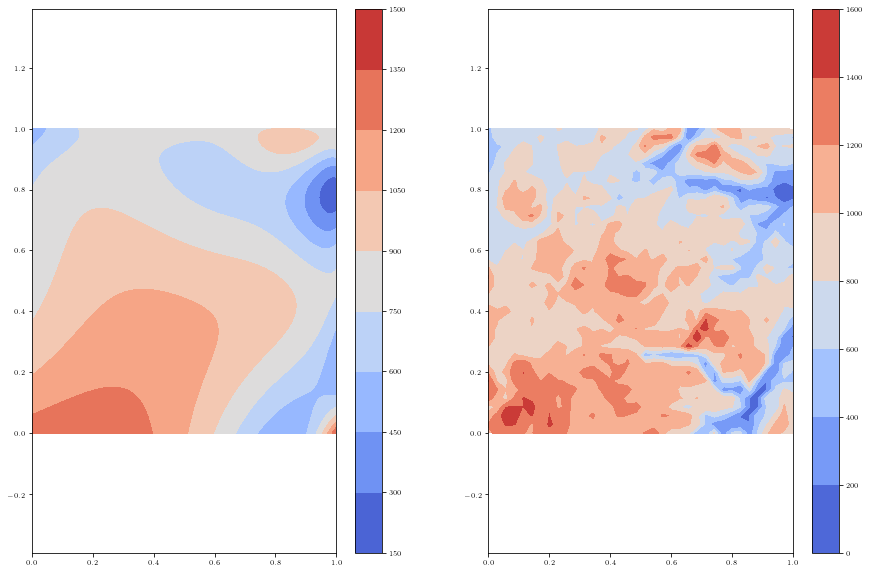

In [22]:
# Lasso

degree = 18
lasso_lambda = 1e-4

X = linear_regression.design_matrix_2D(x,y,degree)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
clf_Lasso = skl.Lasso(alpha=lasso_lambda,fit_intercept=False).fit(X_scaled,z)


x_plot = np.linspace(0,1,2000)
y_plot = np.linspace(0,1,2000)
x_plot_mesh, y_plot_mesh = np.meshgrid(x_plot,y_plot)
x_plot_mesh_flat, y_plot_mesh_flat = x_plot_mesh.flatten(), y_plot_mesh.flatten()
X_plot_design = linear_regression.design_matrix_2D(x_plot_mesh_flat,y_plot_mesh_flat,degree)
X_plot_design_scaled = scaler.transform(X_plot_design)
z_predict_flat = clf_Lasso.predict(X_plot_design_scaled) + z_intercept

x_im = np.linspace(0, 1, point_selection.shape[0])
y_im = np.linspace(0, 1, point_selection.shape[1])
X_im, Y_im = np.meshgrid(x_im, y_im)

fig = plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.contourf(x_plot_mesh, y_plot_mesh, z_predict_flat.reshape(2000,-1), cmap=cm.coolwarm)
plt.colorbar()
plt.axis('equal')

plt.subplot(122)
#plt.imshow(point_selection, cmap=cm.coolwarm)
plt.contourf(X_im, Y_im, point_selection, cmap=cm.coolwarm)
plt.axis('equal')
plt.colorbar()